In [1]:
import pandas as pd
import numpy as np
import sys
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import math as math
from pylab import rcParams
from scipy.stats import zscore 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import KFold, train_test_split, cross_val_score

In [2]:
flights = pd.read_csv('C:/Users/oyeye/OneDrive/Desktop/flights.csv')

In [3]:
flights.head(5)

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58492 entries, 0 to 58491
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      58492 non-null  int64  
 1   DAY        58492 non-null  int64  
 2   WEEKDAY    58492 non-null  int64  
 3   AIRLINE    58492 non-null  object 
 4   ORG_AIR    58492 non-null  object 
 5   DEST_AIR   58492 non-null  object 
 6   SCHED_DEP  58492 non-null  int64  
 7   DEP_DELAY  57659 non-null  float64
 8   AIR_TIME   57474 non-null  float64
 9   DIST       58492 non-null  int64  
 10  SCHED_ARR  58492 non-null  int64  
 11  ARR_DELAY  57474 non-null  float64
 12  DIVERTED   58492 non-null  int64  
 13  CANCELLED  58492 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 6.2+ MB


In [5]:
flights.dropna(how = 'any', inplace = True)

In [6]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57474 entries, 0 to 58491
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      57474 non-null  int64  
 1   DAY        57474 non-null  int64  
 2   WEEKDAY    57474 non-null  int64  
 3   AIRLINE    57474 non-null  object 
 4   ORG_AIR    57474 non-null  object 
 5   DEST_AIR   57474 non-null  object 
 6   SCHED_DEP  57474 non-null  int64  
 7   DEP_DELAY  57474 non-null  float64
 8   AIR_TIME   57474 non-null  float64
 9   DIST       57474 non-null  int64  
 10  SCHED_ARR  57474 non-null  int64  
 11  ARR_DELAY  57474 non-null  float64
 12  DIVERTED   57474 non-null  int64  
 13  CANCELLED  57474 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 6.6+ MB


C:\Users\oyeye\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


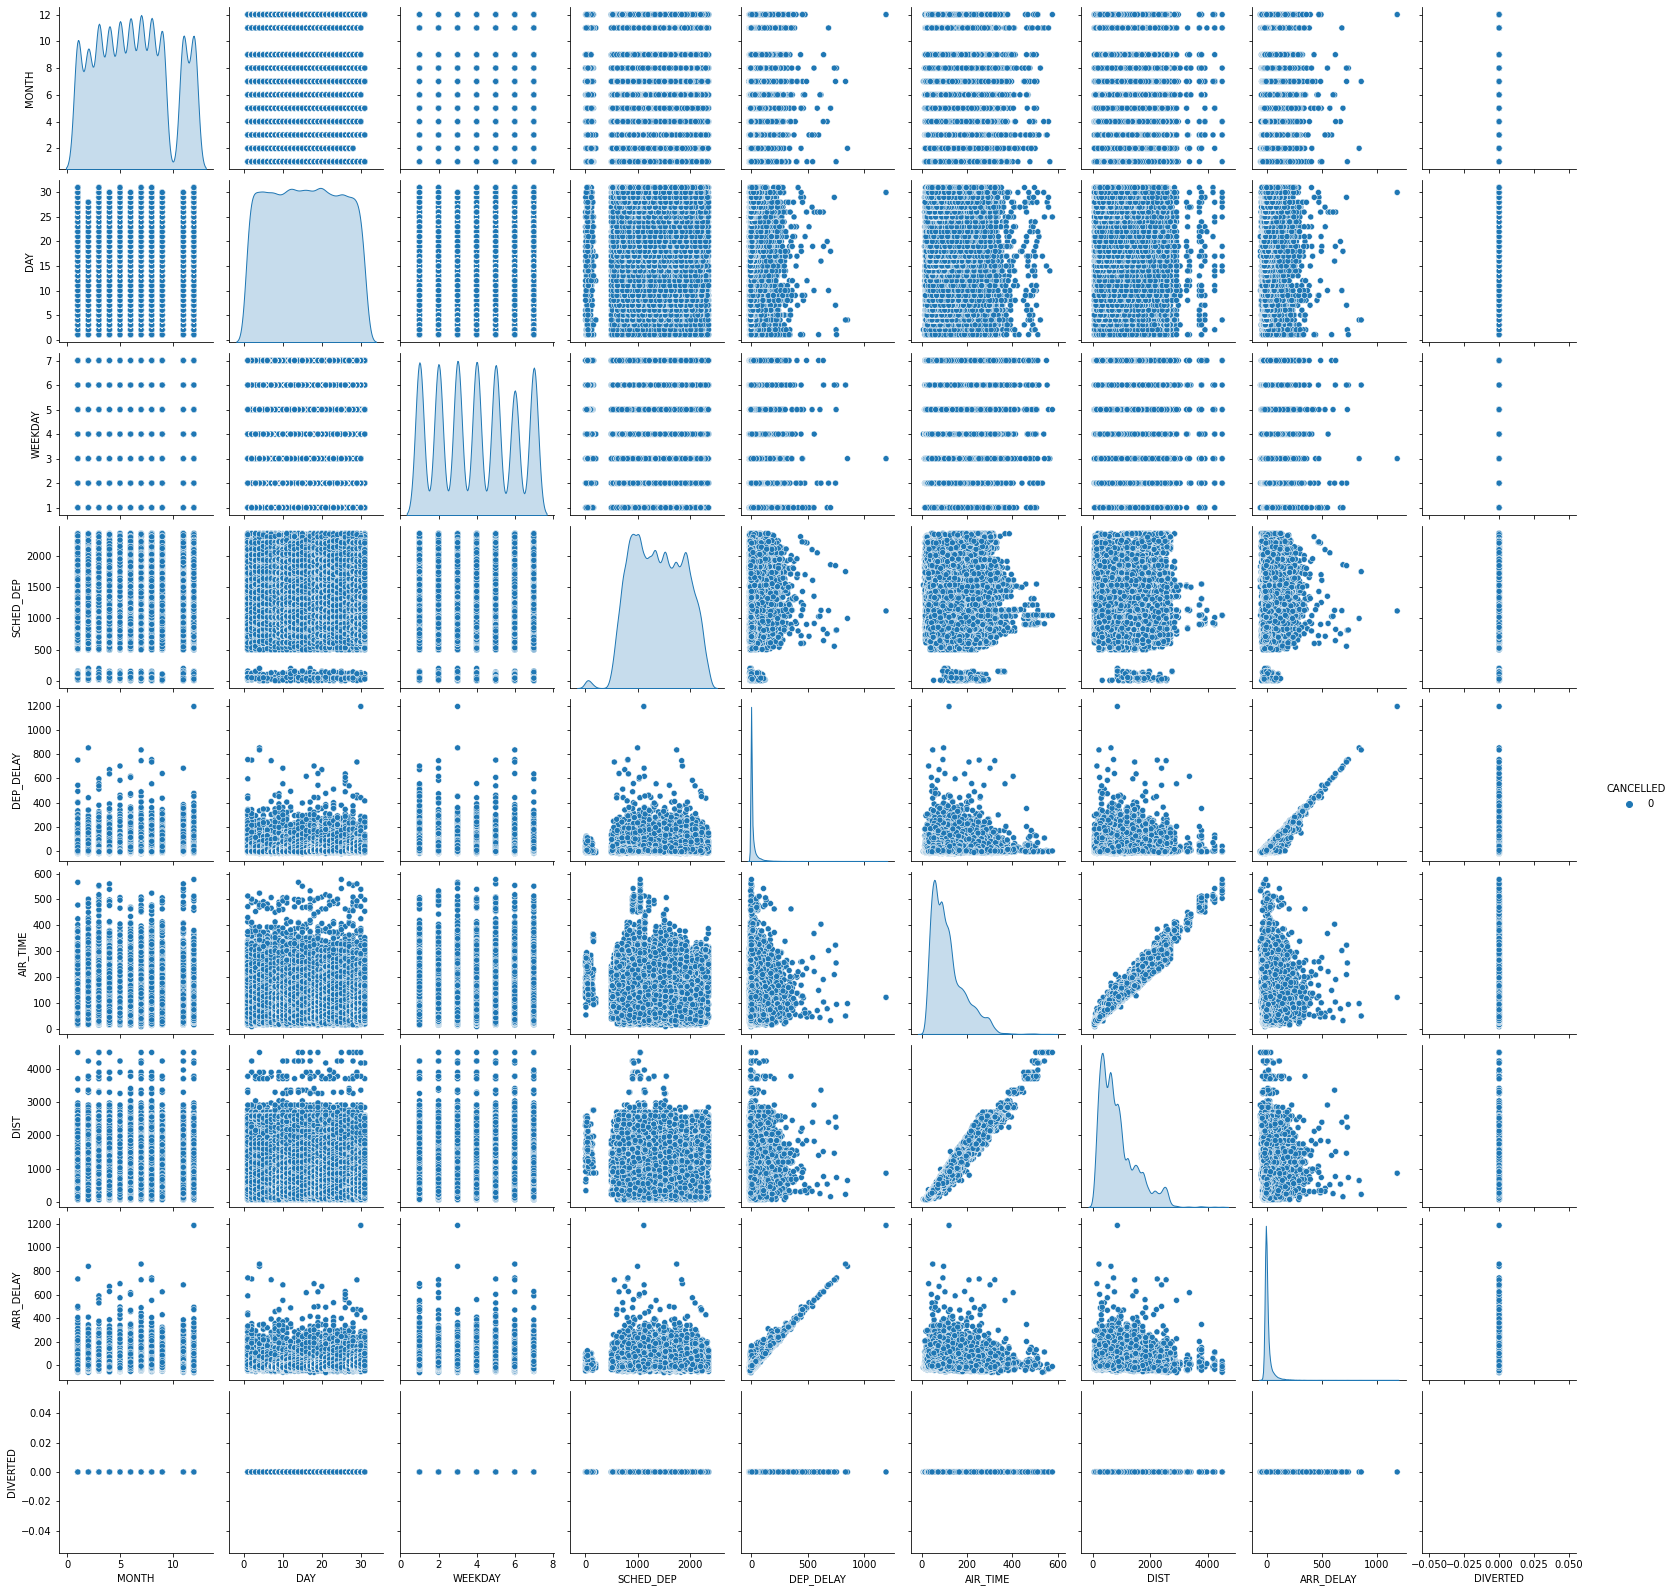

In [7]:
sns.pairplot(flights[['MONTH', 'DAY', 'WEEKDAY', 'AIRLINE', 'SCHED_DEP', 
                      'DEP_DELAY', 'AIR_TIME', 'DIST', 'ARR_DELAY', 'DIVERTED', 'CANCELLED']], hue = 'CANCELLED')

<AxesSubplot:>

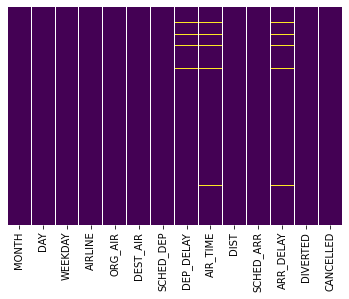

In [7]:
sns.heatmap(flights.isnull(), yticklabels = False, cbar=False, cmap = 'viridis')

<AxesSubplot:xlabel='MONTH', ylabel='count'>

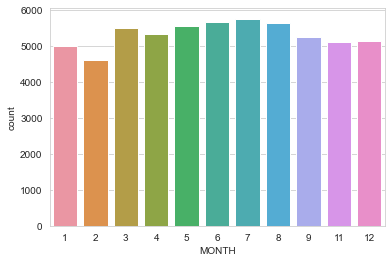

In [8]:
sns.set_style('whitegrid')
sns.countplot(x = 'MONTH', data = flights)

<AxesSubplot:xlabel='WEEKDAY', ylabel='count'>

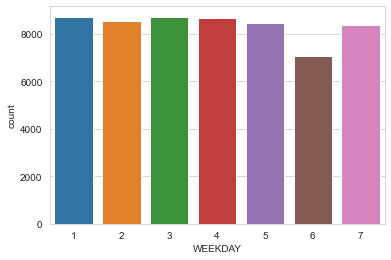

In [9]:
sns.set_style('whitegrid')
sns.countplot(x = 'WEEKDAY', data = flights)

<AxesSubplot:xlabel='AIRLINE', ylabel='count'>

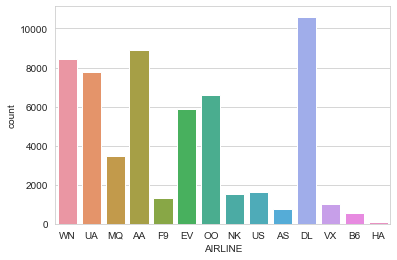

In [10]:
sns.set_style('whitegrid')
sns.countplot(x = 'AIRLINE', data = flights)

<AxesSubplot:xlabel='ORG_AIR', ylabel='count'>

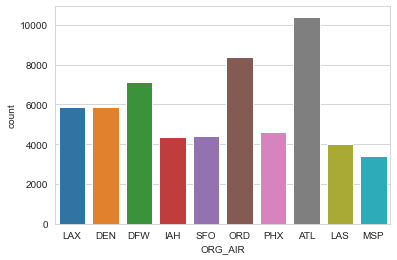

In [11]:
sns.set_style('whitegrid')
sns.countplot(x = 'ORG_AIR', data = flights)

<AxesSubplot:xlabel='DIVERTED', ylabel='count'>

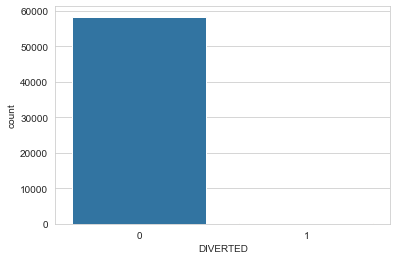

In [12]:
sns.set_style('whitegrid')
sns.countplot(x = 'DIVERTED', data = flights)

In [13]:
n_flights = len(flights)
n_diverted = flights.DIVERTED.value_counts()
print(n_diverted/n_flights*100)

0    99.76578
1     0.23422
Name: DIVERTED, dtype: float64


<AxesSubplot:xlabel='CANCELLED', ylabel='count'>

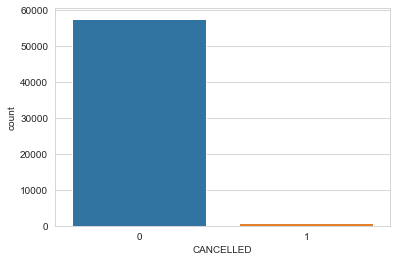

In [14]:
sns.set_style('whitegrid')
sns.countplot(x = 'CANCELLED', data = flights)

In [15]:
n_flights = len(flights)
n_cancelled = flights.CANCELLED.value_counts()
print(n_cancelled/n_flights*100)

0    98.493811
1     1.506189
Name: CANCELLED, dtype: float64


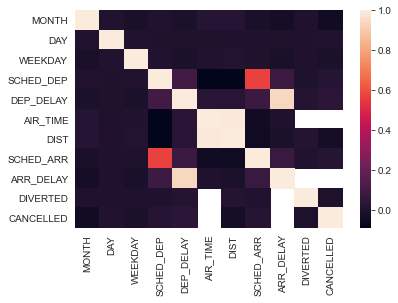

In [16]:
corr_matrix = flights.corr()
sns.heatmap(corr_matrix)
plt.show()

<AxesSubplot:>

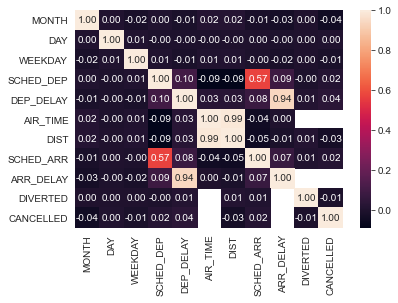

In [17]:
sns.heatmap(flights.corr(), annot = True, fmt = '.2f')

In [18]:
flights.columns[flights.isnull().any()]

Index(['DEP_DELAY', 'AIR_TIME', 'ARR_DELAY'], dtype='object')

In [19]:
cols_to_norm = ['DEP_DELAY','AIR_TIME', 'ARR_DELAY']
flights[cols_to_norm] = flights[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [20]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58492 entries, 0 to 58491
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      58492 non-null  int64  
 1   DAY        58492 non-null  int64  
 2   WEEKDAY    58492 non-null  int64  
 3   AIRLINE    58492 non-null  object 
 4   ORG_AIR    58492 non-null  object 
 5   DEST_AIR   58492 non-null  object 
 6   SCHED_DEP  58492 non-null  int64  
 7   DEP_DELAY  57659 non-null  float64
 8   AIR_TIME   57474 non-null  float64
 9   DIST       58492 non-null  int64  
 10  SCHED_ARR  58492 non-null  int64  
 11  ARR_DELAY  57474 non-null  float64
 12  DIVERTED   58492 non-null  int64  
 13  CANCELLED  58492 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 6.2+ MB


In [21]:
flights

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,0.067323,0.151142,590,1905,0.100402,0,0
1,1,1,4,UA,DEN,IAD,823,0.025452,0.256591,1452,1333,0.037751,0,0
2,1,1,4,MQ,DFW,VPS,1305,0.049261,0.135325,641,1453,0.076305,0,0
3,1,1,4,AA,DFW,DCA,1555,0.025452,0.207381,1192,1935,0.042570,0,0
4,1,1,4,WN,LAX,MCI,1720,0.059113,0.277680,1363,2225,0.079518,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58487,12,31,4,AA,SFO,DFW,515,0.023810,0.277680,1464,1045,0.032932,0,0
58488,12,31,4,F9,LAS,SFO,1910,0.030378,0.110721,414,2050,0.051406,0,0
58489,12,31,4,OO,SFO,SBA,1846,0.014778,0.066784,262,1956,0.044177,0,0
58490,12,31,4,WN,MSP,ATL,525,0.051724,0.203866,907,855,0.075502,0,0


In [22]:
flights['DIST'].min()

67

In [23]:
cols_to_norm = ['SCHED_DEP','DIST', 'SCHED_ARR']
flights[cols_to_norm] = flights[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [24]:
flights

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,0.688190,0.067323,0.151142,0.117926,0.807464,0.100402,0,0
1,1,1,4,UA,DEN,IAD,0.347494,0.025452,0.256591,0.312289,0.564885,0.037751,0,0
2,1,1,4,MQ,DFW,VPS,0.552251,0.049261,0.135325,0.129425,0.615776,0.076305,0,0
3,1,1,4,AA,DFW,DCA,0.658454,0.025452,0.207381,0.253664,0.820187,0.042570,0,0
4,1,1,4,WN,LAX,MCI,0.728547,0.059113,0.277680,0.292221,0.943172,0.079518,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58487,12,31,4,AA,SFO,DFW,0.216653,0.023810,0.277680,0.314994,0.442748,0.032932,0,0
58488,12,31,4,F9,LAS,SFO,0.809261,0.030378,0.110721,0.078241,0.868957,0.051406,0,0
58489,12,31,4,OO,SFO,SBA,0.782073,0.014778,0.066784,0.043968,0.829092,0.044177,0,0
58490,12,31,4,WN,MSP,ATL,0.220901,0.051724,0.203866,0.189402,0.362171,0.075502,0,0


In [25]:
flights['WEEKDAY'].value_counts()

1    8720
3    8706
4    8659
2    8535
5    8453
7    8367
6    7052
Name: WEEKDAY, dtype: int64

In [26]:
f2 = flights.fillna(flights.median())

In [27]:
f2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58492 entries, 0 to 58491
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      58492 non-null  int64  
 1   DAY        58492 non-null  int64  
 2   WEEKDAY    58492 non-null  int64  
 3   AIRLINE    58492 non-null  object 
 4   ORG_AIR    58492 non-null  object 
 5   DEST_AIR   58492 non-null  object 
 6   SCHED_DEP  58492 non-null  float64
 7   DEP_DELAY  58492 non-null  float64
 8   AIR_TIME   58492 non-null  float64
 9   DIST       58492 non-null  float64
 10  SCHED_ARR  58492 non-null  float64
 11  ARR_DELAY  58492 non-null  float64
 12  DIVERTED   58492 non-null  int64  
 13  CANCELLED  58492 non-null  int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 6.2+ MB


<AxesSubplot:>

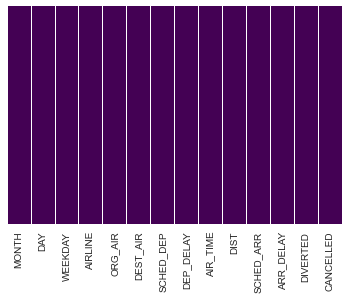

In [28]:
sns.heatmap(f2.isnull(), yticklabels = False, cbar=False, cmap = 'viridis')

In [29]:
f3 = f2.drop(['AIRLINE', 'ORG_AIR', 'DEST_AIR'], axis = 1)

In [30]:
outcome = 'CANCELLED'
predictors = [c for c in f3.columns if c not in outcome]

In [31]:
features = f3[predictors]
target = f3[outcome]

In [32]:
target_train, target_test, features_train, features_test = train_test_split(target, features, test_size = 0.25)

In [33]:
target_test.shape

(14623,)

# Decision Tree Classifier

In [82]:
from sklearn import metrics
dtree = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 8, 
                               criterion = 'entropy', random_state = 42)

In [83]:
dtree.fit(features_train,target_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, random_state=42)

In [84]:
print('Training Accuracy: {:.3f}'.format(accuracy_score(target_train, dtree.predict(features_train))))

Training Accuracy: 1.000


In [85]:
predictions = dtree.predict(features_test)

In [86]:
print(classification_report(target_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14386
           1       1.00      1.00      1.00       237

    accuracy                           1.00     14623
   macro avg       1.00      1.00      1.00     14623
weighted avg       1.00      1.00      1.00     14623



In [87]:
print(confusion_matrix(target_test, predictions))

[[14385     1]
 [    0   237]]


In [88]:
print('Training Accuracy: {:.3f}'.format(accuracy_score(target_train, dtree.predict(features_train))))
print('Test Accuracy: {:.3f}'.format(accuracy_score(target_test, predictions)))
print('AUC value is: {:.3f}'.format(roc_auc_score(target_test, predictions)))

Training Accuracy: 1.000
Test Accuracy: 1.000
AUC value is: 1.000


In [89]:
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

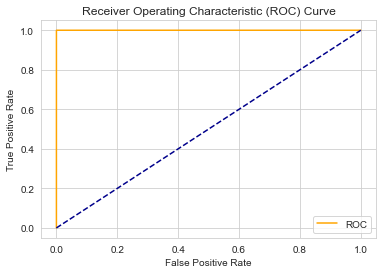

In [90]:
fper, tper, thresholds = roc_curve(target_test, predictions) 
plot_roc_curve(fper, tper)

# Improvements

In [91]:
std_slc = StandardScaler()

In [92]:
pca = decomposition.PCA()

In [93]:
dec_tree = tree.DecisionTreeClassifier()

In [94]:
pipe = Pipeline(steps=[('std_slc', std_slc), ('pca', pca), ('dec_tree', dec_tree)])

In [95]:
n_components = list(range(1, features.shape[1]+1,1))

In [96]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [97]:
parameters = dict(pca__n_components=n_components, dec_tree__criterion=criterion, dec_tree__max_depth=max_depth)

In [98]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(features, target)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [64]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])

Best Criterion: entropy


In [65]:
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])

Best max_depth: 8


In [66]:
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])

Best Number Of Components: 10


In [67]:
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])


DecisionTreeClassifier(criterion='entropy', max_depth=8)


# Random Forest Model

In [100]:
rfc = RandomForestClassifier(n_estimators=100, random_state = 101)
rfc.fit(features_train, target_train)

RandomForestClassifier(random_state=101)

In [101]:
print('Training Accuracy: {:.3f}'.format(accuracy_score(target_train, rfc.predict(features_train))))

Training Accuracy: 1.000


In [103]:
rfc_pred = rfc.predict(features_test)

In [104]:
print(classification_report(target_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14386
           1       1.00      0.99      1.00       237

    accuracy                           1.00     14623
   macro avg       1.00      1.00      1.00     14623
weighted avg       1.00      1.00      1.00     14623



In [105]:
print(confusion_matrix(target_test, rfc_pred))

[[14386     0]
 [    2   235]]


In [106]:
print('Training Accuracy: {:.3f}'.format(accuracy_score(target_train, rfc.predict(features_train))))
print('Test Accuracy: {:.3f}'.format(accuracy_score(target_test, rfc_pred)))
print('AUC value is: {:.3f}'.format(roc_auc_score(target_test, rfc_pred)))

Training Accuracy: 1.000
Test Accuracy: 1.000
AUC value is: 0.996


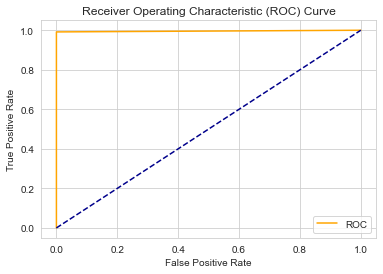

In [107]:
fper, tper, thresholds = roc_curve(target_test, rfc_pred) 
plot_roc_curve(fper, tper)

# Logistic Regression

In [108]:
logmodel = LogisticRegression()
logmodel.fit(features_train, target_train)

LogisticRegression()

In [109]:
print('Training Accuracy: {:.3f}'.format(accuracy_score(target_train, logmodel.predict(features_train))))

Training Accuracy: 0.985


In [112]:
log_pred = logmodel.predict(features_test)

In [113]:
print(classification_report(target_test, log_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14386
           1       0.00      0.00      0.00       237

    accuracy                           0.98     14623
   macro avg       0.49      0.50      0.50     14623
weighted avg       0.97      0.98      0.98     14623



C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
print(confusion_matrix(target_test, log_pred))

[[14386     0]
 [  237     0]]


In [115]:
print('Training Accuracy: {:.3f}'.format(accuracy_score(target_train, logmodel.predict(features_train))))
print('Test Accuracy: {:.3f}'.format(accuracy_score(target_test, log_pred)))
print('AUC value is: {:.3f}'.format(roc_auc_score(target_test, log_pred)))

Training Accuracy: 0.985
Test Accuracy: 0.984
AUC value is: 0.500


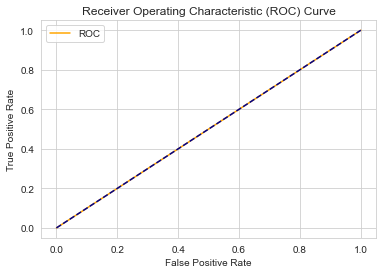

In [116]:
fper, tper, thresholds = roc_curve(target_test, log_pred) 
plot_roc_curve(fper, tper)